## Practice
1. Input images from webcam.
2. Use cv2.CascadeClassifier() to detect your face.
3. Perform <b> image vignetting </b> centered on detected face.
4. Show your output images.
5. Upload your Jupyter code file (*.ipynb)

In [2]:
#face detector
 
import cv2
import numpy as np
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) 
scaling_factor = 0.5
while True:
    ret, frame = cap.read()
    ro, co = frame.shape[:2]
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=3)
    
    rows, cols = frame.shape[:2]
    kernel_x = cv2.getGaussianKernel(cols,50)
    kernel_y = cv2.getGaussianKernel(rows,50)
    kernel = kernel_y * kernel_x.T
    mask = cv2.normalize(kernel, None, 0, 1, cv2.NORM_MINMAX)
    mask2 = cv2.normalize(kernel, None, 1, 1, cv2.NORM_MINMAX)
    output = np.copy(frame)
    #for i in range(3):
        #output[:,:,i] = output[:,:,i] * mask
    for (x,y,w,h) in face_rects:
        x = int(x*0.8)
        y = int(y*0.8)
        w = int(w*1.2)
        h = int(h*1.2)
        rows, cols = w,h
        kernel_x = cv2.getGaussianKernel(cols,30)
        kernel_y = cv2.getGaussianKernel(rows,30)
        kernel = kernel_y * kernel_x.T
        mask = cv2.normalize(kernel, None, 0, 1, cv2.NORM_MINMAX)
        output = np.copy(frame)
        for i in range(3):
            output[y:y+h, x:x+w,i] = output[y:y+h, x:x+w,i] * mask
            output[0:y, 0:co,i] = output[0:y, 0:co,i]*0
            output[0:ro, 0:x,i] = output[0:ro, 0:x,i]*0
            output[0:ro, x+w:co,i] = output[0:ro, x+w:co,i]*0
            output[y+h:ro, x:co,i] = output[y+h:ro, x:co,i]*0
          
        #cv2.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 3)
    cv2.imshow('Face Detector', output)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

### output
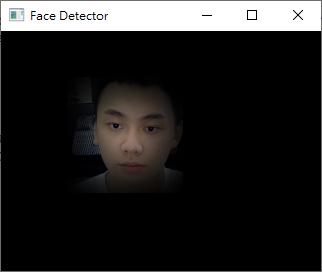